In [2]:
import sys
from os import path
_up_one = path.abspath('../')
if _up_one not in sys.path:
    sys.path.insert(1, _up_one)

# Third-party
from astropy.io import ascii
import astropy.coordinates as coord
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.integrate import tplquad
from scipy.optimize import minimize

import gala.potential as gp
from gala.units import galactic
from lg_barycentric import LocalGroupBarycentric

In [211]:
mw_mvir = 1.5E12 * u.Msun
mw_rs = 20. * u.kpc
mw_rvir = 250. * u.kpc
c = mw_rvir / mw_rs
mw_mass = mw_mvir / (np.log(1 + c) - c / (1 + c))

m31_mvir = 2E12 * u.Msun
m31_rvir = 300 * u.kpc
m31_rs = m31_rvir / c
m31_mass = m31_mvir / (np.log(1 + c) - c / (1 + c))

c

<Quantity 12.5>

In [212]:
lg_bary = LocalGroupBarycentric(mw_mass=mw_mass, m31_mass=m31_mass)

m31_cen = coord.SkyCoord(ra='00 42 44.330', dec='+41 16 07.50', distance=779*u.kpc,
                         unit=(u.hourangle, u.degree))
m31_cen = m31_cen.transform_to(lg_bary)

mw_cen = coord.Galactocentric(x=0*u.pc, y=0*u.pc, z=0*u.pc)
mw_cen = mw_cen.transform_to(lg_bary)

In [239]:
m31_xyz = m31_cen.cartesian.xyz.to(u.kpc)
mw_cen.cartesian.xyz.to(u.kpc), m31_xyz

(<Quantity [-447.445288,    0.      ,    0.      ] kpc>,
 <Quantity [ 3.35583966e+02,  3.40473946e-07, -1.01468913e-08] kpc>)

From Mathematica: Intertia tensor notebook

In [214]:
qs = dict()

qs[(1e12*u.Msun, 15*u.kpc)] = 0.386967
qs[(1e12*u.Msun, 20*u.kpc)] = 0.408714
qs[(1e12*u.Msun, 25*u.kpc)] = 0.426762

qs[(1.25e12*u.Msun, 15*u.kpc)] = 0.37111
qs[(1.25e12*u.Msun, 20*u.kpc)] = 0.39251
qs[(1.25e12*u.Msun, 25*u.kpc)] = 0.41032

qs[(1.5e12*u.Msun, 15*u.kpc)] = 0.36273
qs[(1.5e12*u.Msun, 20*u.kpc)] = 0.38396
qs[(1.5e12*u.Msun, 25*u.kpc)] = 0.40166

q = qs[(mw_mvir, mw_rs)]
print(q)

0.38396


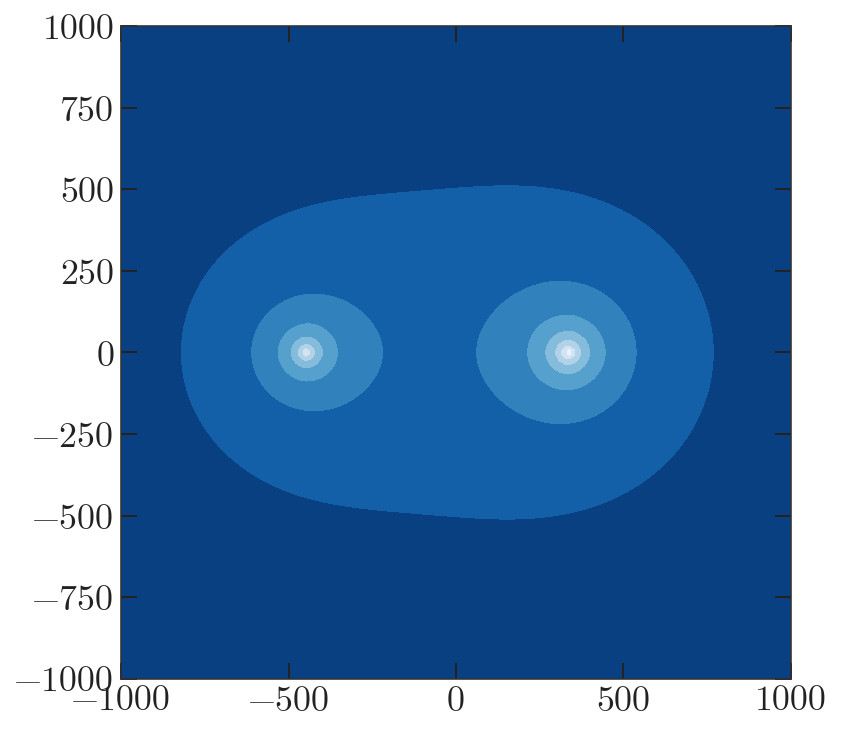

In [215]:
pot = gp.CCompositePotential()

pot['mw'] = gp.NFWPotential(m=mw_mass, r_s=mw_rs, 
                            units=galactic,
                            origin=mw_cen.cartesian.xyz.to(u.kpc))

pot['m31'] = gp.NFWPotential(m=m31_mass, r_s=m31_rs, 
                             units=galactic,
                             origin=m31_cen.cartesian.xyz)

grid = np.linspace(-1000, 1000, 128)*u.kpc
_ = pot.plot_contours(grid=(grid, 0, grid), )

---

In [216]:
nearby = ascii.read('../data/NearbyGalaxiese_formatted.txt')
ra = (nearby['RA_h']+nearby['RA_m']/60.+nearby['RA_s']/3600) * u.hourangle
dec = (nearby['Dec_d']+nearby['Dec_m']/60+nearby['Dec_s']/3600) * u.degree
dist = coord.Distance(distmod=nearby['Dist'])

# nearby = ascii.read('../data/NearbyGalaxies.dat', delimiter=',')
# ra = nearby['RA'] * u.hourangle
# dec = nearby['Dec'] * u.deg
# dist = coord.Distance(distmod=nearby['distmod'])

In [217]:
# def func(z, y, x, i1, i2):
#     arr = [x, y, z]
#     return pot._density(np.array([[x, y, z]]), t=np.array([0.])) * arr[i1] * arr[i2]

In [218]:
# lim = 1000
# res = tplquad(func,
#               a=-lim, b=lim, 
#               gfun=lambda *args: -lim, hfun=lambda *args: lim, 
#               qfun=lambda *args: -lim, rfun=lambda *args: lim,
#               args=(0, 0), epsabs=1E-1, epsrel=1E-4)

In [219]:
c = coord.SkyCoord(ra=ra, dec=dec, distance=dist,
                   unit=(u.hourangle, u.deg))

In [220]:
c_barycen = c.transform_to(lg_bary)

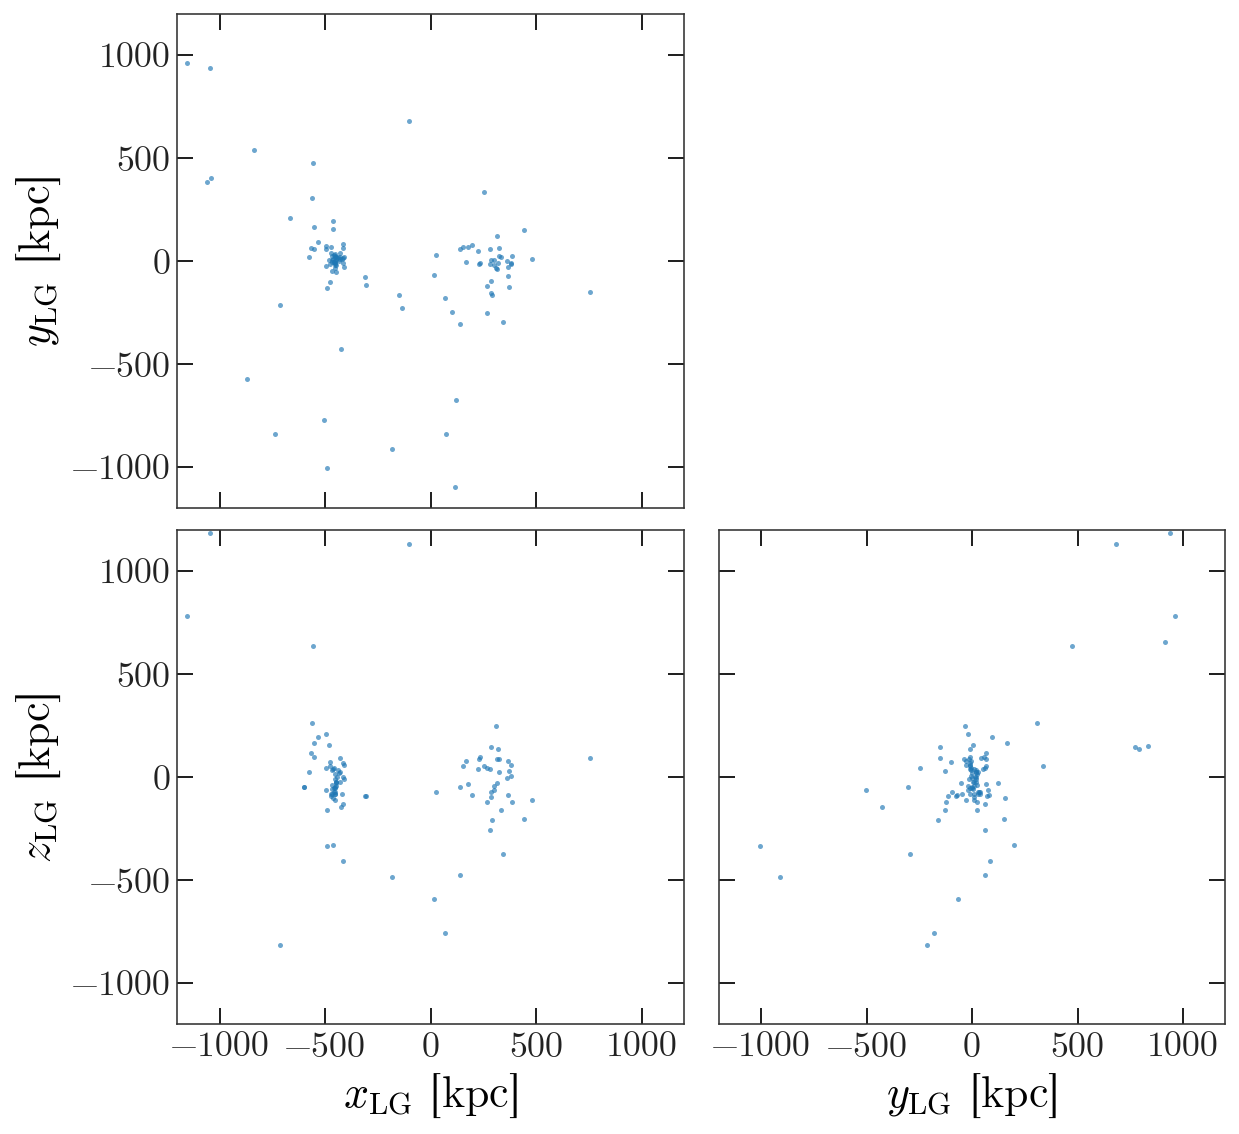

In [221]:
style = dict(marker='.', linestyle='none', alpha=0.65)

fig, axes = plt.subplots(2, 2, figsize=(8.75,8), sharex=True, sharey=True)

axes[0,0].plot(c_barycen.cartesian.xyz[0],
               c_barycen.cartesian.xyz[1],
               **style)
axes[1,0].plot(c_barycen.cartesian.xyz[0],
               c_barycen.cartesian.xyz[2],
               **style)
axes[1,1].plot(c_barycen.cartesian.xyz[1],
               c_barycen.cartesian.xyz[2],
               **style)

axes[0,0].set_xlim(-1200, 1200)
axes[0,0].set_ylim(-1200, 1200)

axes[0,0].set_ylabel(r'$y_{\rm LG}$ [kpc]')
axes[1,0].set_ylabel(r'$z_{\rm LG}$ [kpc]')
axes[1,0].set_xlabel(r'$x_{\rm LG}$ [kpc]')
axes[1,1].set_xlabel(r'$y_{\rm LG}$ [kpc]')

axes[0,0].xaxis.set_ticks(np.arange(-1000, 1000+1, 500))
axes[0,0].yaxis.set_ticks(axes[0,0].get_xticks())

axes[0,1].set_visible(False)

fig.tight_layout()

/Users/adrian/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt
/Users/adrian/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in sqrt
/Users/adrian/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in sqrt
/Users/adrian/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in sqrt
/Users/adrian/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in sqrt
/Users/adrian/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in sqrt


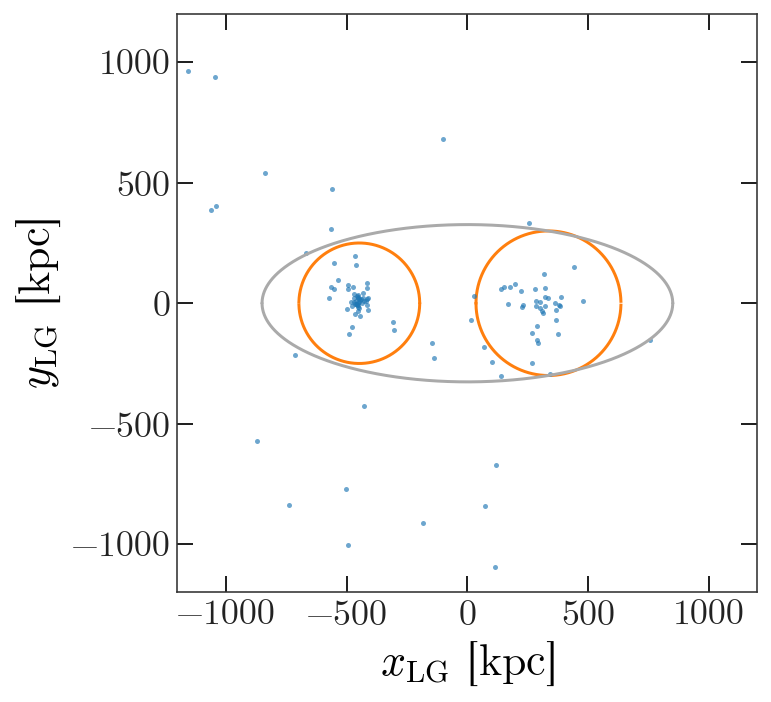

In [222]:
xgrid = np.linspace(-1000, 1000, 16384)

fig, ax = plt.subplots(1, 1, figsize=(5.5, 5))

ax.plot(c_barycen.cartesian.xyz[0],
        c_barycen.cartesian.xyz[1],
        **style)

mw_xyz = mw_cen.cartesian.xyz.to(u.kpc).value
rvir = 250.
y1 = np.sqrt(rvir**2 - (xgrid - mw_xyz[0])**2)
y2 = -np.sqrt(rvir**2 - (xgrid - mw_xyz[0])**2)
ax.plot(xgrid, y1, marker='', color='tab:orange', zorder=-10)
ax.plot(xgrid, y2, marker='', color='tab:orange', zorder=-10)

m31_xyz = m31_cen.cartesian.xyz.to(u.kpc).value
rvir = 300.
y1 = np.sqrt(rvir**2 - (xgrid - m31_xyz[0])**2)
y2 = -np.sqrt(rvir**2 - (xgrid - m31_xyz[0])**2)
ax.plot(xgrid, y1, marker='', color='tab:orange', zorder=-10)
ax.plot(xgrid, y2, marker='', color='tab:orange', zorder=-10)

# rstar = 850.
rstar = np.sqrt(m31_xyz[0]**2 + m31_rvir**2 / q**2).to_value(u.kpc)
y1 = q * np.sqrt(rstar**2 - xgrid**2)
y2 = -q * np.sqrt(rstar**2 - xgrid**2)
ax.plot(xgrid, y1, marker='', color='#aaaaaa')
ax.plot(xgrid, y2, marker='', color='#aaaaaa')

ax.set_xlim(-1200, 1200)
ax.set_ylim(-1200, 1200)

ax.set_xlabel(r'$x_{\rm LG}$ [kpc]')
ax.set_ylabel(r'$y_{\rm LG}$ [kpc]')

fig.tight_layout()
fig.set_facecolor('w')
# fig.savefig('rvir_ell.pdf')

In [223]:
def get_r(cosphi, sinphi, costhe, sinthe, re, q):
    t1 = cosphi**2 * sinthe**2
    t2 = (sinphi**2 * sinthe**2 + costhe**2) / q**2
    return re / np.sqrt(t1 + t2)

def get_xyz_ellipse(phi, the, re, q):
    cosphi = np.cos(phi)
    sinphi = np.sin(phi)
    costhe = np.cos(the)
    sinthe = np.sin(the)
    
    r = get_r(cosphi, sinphi, costhe, sinthe, re, q)
    x = r * cosphi * sinthe
    y = r * sinphi * sinthe
    z = r * costhe
    
    return np.array([x, y, z])

def is_inside(pt, re, q):
    return (pt[0]**2 / re**2 + (pt[1]**2 + pt[2]**2) / (re**2 * q**2)) <= 1

In [224]:
phi_grid = np.linspace(0, 2*np.pi, 512)
the_grid = np.linspace(-np.pi/2, np.pi/2, 512)
ang_grid = np.vstack(map(np.ravel, np.meshgrid(phi_grid, the_grid)))

In [225]:
bary_xyz = c_barycen.cartesian.xyz.value

In [226]:
def func(p, xyz):
    phi, the = p
    xyz_el = get_xyz_ellipse(phi, the, rstar, q).T
    return np.sqrt(np.sum((xyz - xyz_el)**2, axis=-1))

In [227]:
closest_ell_xyz = np.zeros((3, bary_xyz.shape[1]))
for i in range(bary_xyz.shape[1]):
    res = minimize(func, ang_grid[:, func(ang_grid, bary_xyz[:, i]).argmin()], 
                   args=(bary_xyz[:, i],))
    
    if not res.success:
        print(i)
        
    closest_ell_xyz[:, i] = get_xyz_ellipse(res.x[0], res.x[1], rstar, q)

4
17
19
24
41
51
84
96
100
101
103
106
110
111
112
114
115
116
117
119
124
126


/Users/adrian/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/Users/adrian/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in sqrt


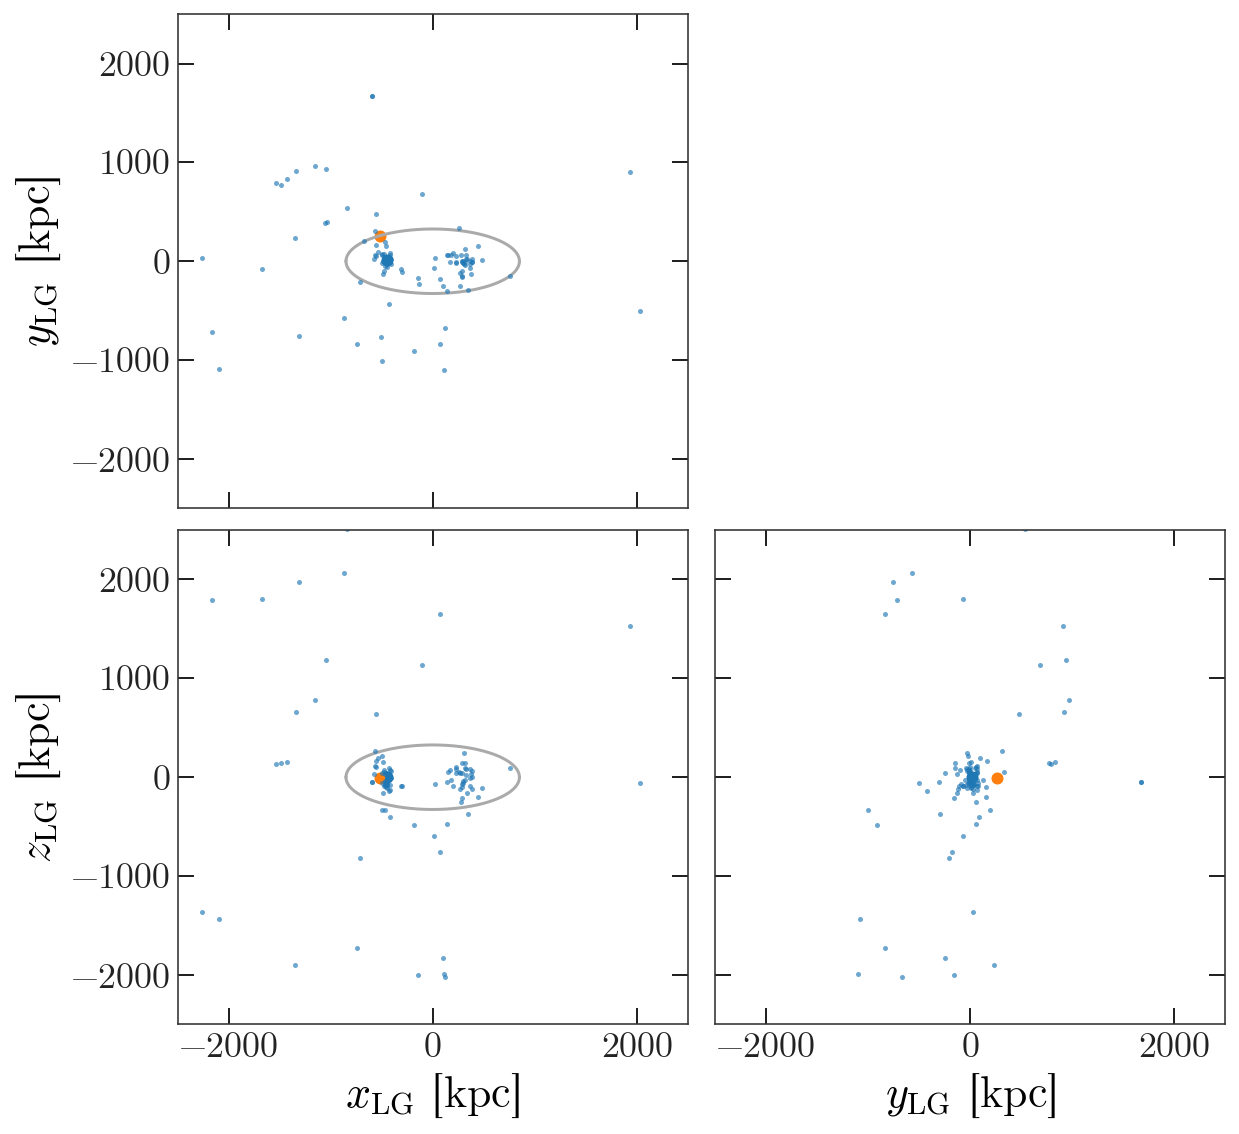

In [228]:
i = 0

fig, axes = plt.subplots(2, 2, figsize=(8.75,8), sharex=True, sharey=True)

rstar = 850.
y1 = q * np.sqrt(rstar**2 - xgrid**2)
y2 = -q * np.sqrt(rstar**2 - xgrid**2)
axes[0, 0].plot(xgrid, y1, marker='', color='#aaaaaa')
axes[0, 0].plot(xgrid, y2, marker='', color='#aaaaaa')
axes[1, 0].plot(xgrid, y1, marker='', color='#aaaaaa')
axes[1, 0].plot(xgrid, y2, marker='', color='#aaaaaa')

style = dict(marker='.', linestyle='none', alpha=0.65)

axes[0,0].plot(c_barycen.cartesian.xyz[0],
               c_barycen.cartesian.xyz[1],
               **style)
axes[1,0].plot(c_barycen.cartesian.xyz[0],
               c_barycen.cartesian.xyz[2],
               **style)
axes[1,1].plot(c_barycen.cartesian.xyz[1],
               c_barycen.cartesian.xyz[2],
               **style)

axes[0,0].scatter(c_barycen.cartesian.xyz[0, i],
                  c_barycen.cartesian.xyz[1, i])
axes[1,0].scatter(c_barycen.cartesian.xyz[0, i],
                  c_barycen.cartesian.xyz[2, i])
axes[1,1].scatter(c_barycen.cartesian.xyz[1, i],
                  c_barycen.cartesian.xyz[2, i])

axes[0,0].scatter(closest_ell_xyz[0, i],
                  closest_ell_xyz[1, i])
axes[1,0].scatter(closest_ell_xyz[0, i],
                  closest_ell_xyz[2, i])
axes[1,1].scatter(closest_ell_xyz[1, i],
                  closest_ell_xyz[2, i])

axes[0,0].set_xlim(-2500, 2500)
axes[0,0].set_ylim(-2500, 2500)

axes[0,0].set_ylabel(r'$y_{\rm LG}$ [kpc]')
axes[1,0].set_ylabel(r'$z_{\rm LG}$ [kpc]')
axes[1,0].set_xlabel(r'$x_{\rm LG}$ [kpc]')
axes[1,1].set_xlabel(r'$y_{\rm LG}$ [kpc]')

axes[0,1].set_visible(False)

fig.tight_layout()

In [229]:
r_ell = np.sqrt(c_barycen.x**2 + (c_barycen.y**2 + c_barycen.z**2) / q**2)
surf_dist = np.sqrt(np.sum((bary_xyz - closest_ell_xyz)**2, axis=0))
surf_dist[is_inside(bary_xyz, rstar, q)] *= -1

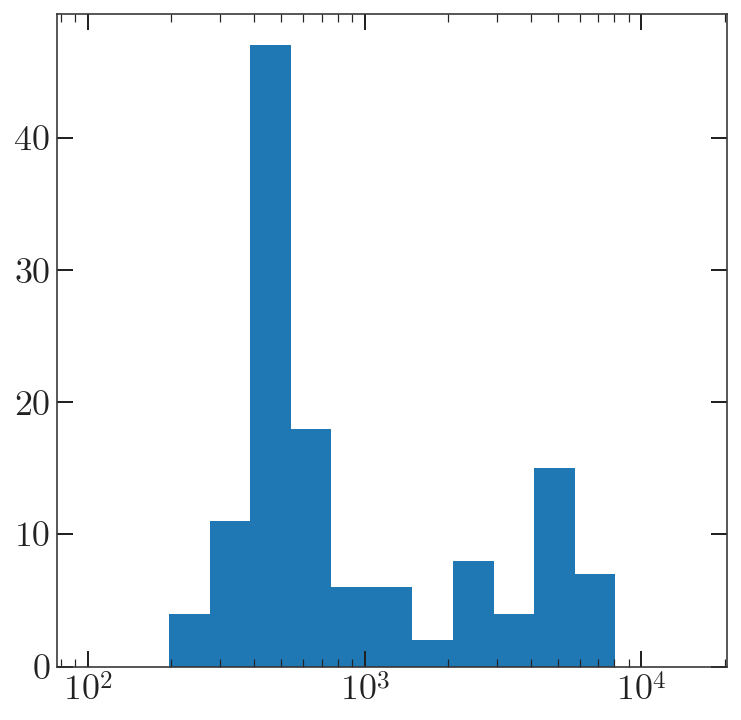

In [230]:
plt.hist(r_ell, bins=np.logspace(2, 4.2, 16));
plt.xscale('log')

(array([84.,  9.,  2.,  3.,  6.,  4.,  4.,  8.,  5.,  3.]),
 array([-283.98429406,   12.61557913,  309.21545231,  605.8153255 ,
         902.41519868, 1199.01507186, 1495.61494505, 1792.21481823,
        2088.81469142, 2385.4145646 , 2682.01443779]),
 <a list of 10 Patch objects>)

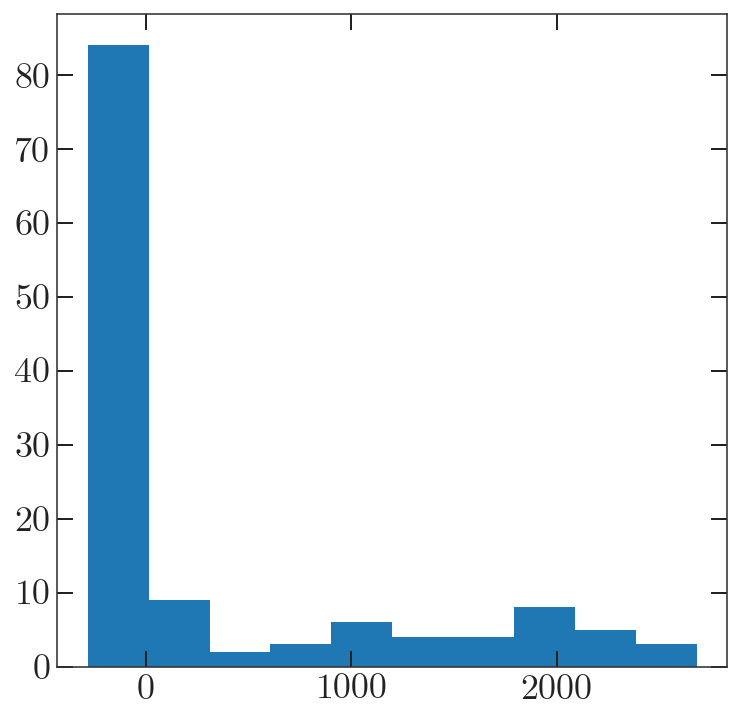

In [231]:
plt.hist(surf_dist) #, bins=np.logspace(2, 4.2, 16));
# plt.xscale('log')

In [232]:
nearby['r_ell'] = r_ell
nearby['ell_surf_dist'] = surf_dist

In [233]:
nearby.write('../data/NearbyGalaxies_m{0:.1f}_rs{1:.0f}.dat'.format((mw_mvir.value/1e12), mw_rs.value), 
             format='ascii', delimiter=' ', overwrite=True)

(0, 20)

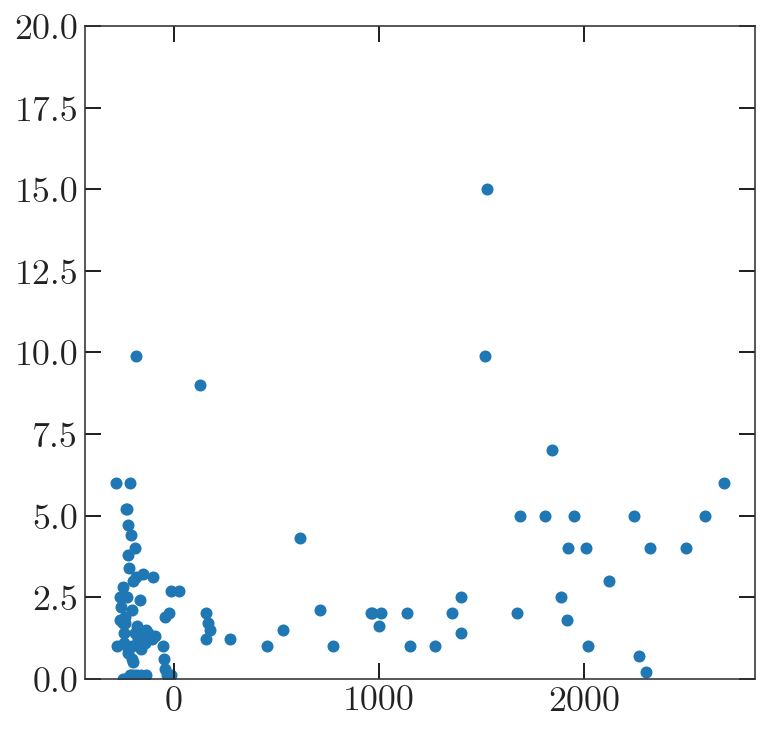

In [234]:
plt.scatter(nearby['ell_surf_dist'], nearby['MHI'])
plt.ylim(0, 20)

# Combine the files:

In [235]:
import glob
import re

In [236]:
nearby_joint = ascii.read('../data/NearbyGalaxiese_formatted.txt')

In [237]:
pattr = re.compile('(m[0-9\.]+_rs[0-9]+)')

nearby_joint = ascii.read('../data/NearbyGalaxiese_formatted.txt')

for f in glob.glob('../data/NearbyGalaxies_m*'):
    name = pattr.search(f).groups()[0]
    tbl = ascii.read(f)
    nearby_joint['r_ell_' + name] = tbl['r_ell']
    nearby_joint['ell_surf_dist_' + name] = tbl['ell_surf_dist']

In [238]:
nearby_joint.write('../data/NearbyGalaxies_joint.dat', 
             format='ascii', delimiter=' ', overwrite=True)